In [102]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model


In [107]:
def get_dnn_model():
    input = Input(shape=())
    x = Dense(32, activation = 'relu')(input)
    x = Dense(64, activation = 'relu')(x)
    x = Dense(128, activation = 'relu')(x)
    output = Dense(1, activation = 'tanh')(x)

    model = Model(input, output, name = "alumodel");

    model.compile(loss = 'mse', optimizer = 'adam', metrics = ['r2_score'])
    return model

In [106]:
model = get_dnn_model()
model.summary()

Model: "alumodel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
def f(x):
    return 5 * x ** 3 - 8 * x ** 2 - 7 * x + 1

In [86]:
import numpy as np
x = np.linspace(-20, 20, 1000)
y = f(x)

x = 2 * ( (x - min(x)) / (max(x) - min(x))) - 1
y = 2 * ( (y - min(y)) / (max(y) - min(y))) - 1

In [87]:
print(x[:10])
print(y[:10])


[-1.         -0.997998   -0.995996   -0.99399399 -0.99199199 -0.98998999
 -0.98798799 -0.98598599 -0.98398398 -0.98198198]
[-1.         -0.99367087 -0.98736646 -0.98108673 -0.97483163 -0.96860112
 -0.96239514 -0.95621365 -0.95005659 -0.94392393]


In [88]:
from sklearn.model_selection import train_test_split


In [89]:
train_x, tv_x, train_y, tv_y = train_test_split(x, y, test_size = 0.10, random_state = 42)
test_x, val_x, test_y, val_y = train_test_split(tv_x, tv_y, test_size = 0.5, random_state = 42)

In [108]:
history = model.fit(train_x, train_y, epochs = 10, batch_size = 4, validation_data = (val_x, val_y))

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0307 - r2_score: 0.7204 - val_loss: 0.0040 - val_r2_score: 0.9682
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - r2_score: 0.9731 - val_loss: 0.0012 - val_r2_score: 0.9907
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - r2_score: 0.9901 - val_loss: 0.0010 - val_r2_score: 0.9919
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - r2_score: 0.9926 - val_loss: 5.3235e-04 - val_r2_score: 0.9958
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1643e-04 - r2_score: 0.9945 - val_loss: 3.3452e-04 - val_r2_score: 0.9973
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7390e-04 - r2_score: 0.9967 - val_loss: 2.1804e-04 - val_r2_score: 0.9983
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6485e-04 - r2_score: 0.9973 - val_loss: 4.7032e-04 - val_r2_score: 0.9963
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.7560e-04 - r2_

In [91]:
import matplotlib.pyplot as plt


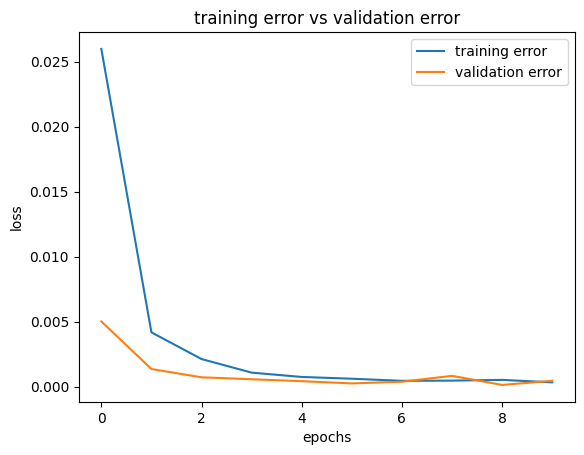

In [100]:
plt.plot(history.history['loss'], label = 'training error')
plt.plot(history.history['val_loss'], label = 'validation error')
plt.title('training error vs validation error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

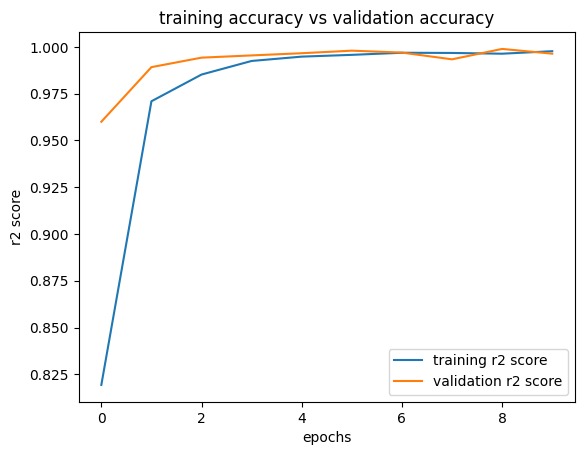

In [98]:
plt.plot(history.history['r2_score'], label = 'training r2 score')
plt.plot(history.history['val_r2_score'], label = 'validation r2 score')
plt.title('training accuracy vs validation accuracy')
plt.xlabel('epochs')
plt.ylabel('r2 score')
plt.legend()
plt.show()

In [94]:
y_pred = model.predict(test_x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [95]:
model.evaluate(test_x, test_y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2777e-04 - r2_score: 0.9968


[0.0005687815719284117, 0.996452808380127]

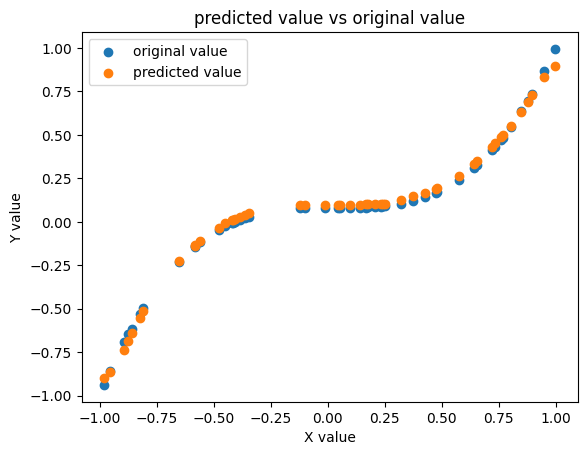

In [99]:
plt.scatter(test_x, test_y, label = 'original value')
plt.scatter(test_x, y_pred, label = 'predicted value')
plt.title('predicted value vs original value')
plt.xlabel('X value')
plt.ylabel('Y value')
plt.legend()
plt.show()